# Assignment 3 - Building a Custom Visualization

---

In this assignment you must choose one of the options presented below and submit a visual as well as your source code for peer grading. The details of how you solve the assignment are up to you, although your assignment must use matplotlib so that your peers can evaluate your work. The options differ in challenge level, but there are no grades associated with the challenge level you chose. However, your peers will be asked to ensure you at least met a minimum quality for a given technique in order to pass. Implement the technique fully (or exceed it!) and you should be able to earn full grades for the assignment.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ferreira, N., Fisher, D., & Konig, A. C. (2014, April). [Sample-oriented task-driven visualizations: allowing users to make better, more confident decisions.](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In Proceedings of the SIGCHI Conference on Human Factors in Computing Systems (pp. 571-580). ACM. ([video](https://www.youtube.com/watch?v=BI7GAs-va-Q))


In this [paper](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) the authors describe the challenges users face when trying to make judgements about probabilistic data generated through samples. As an example, they look at a bar chart of four years of data (replicated below in Figure 1). Each year has a y-axis value, which is derived from a sample of a larger dataset. For instance, the first value might be the number votes in a given district or riding for 1992, with the average being around 33,000. On top of this is plotted the 95% confidence interval for the mean (see the boxplot lectures for more information, and the yerr parameter of barcharts).

<br>
<img src="readonly/Assignment3Fig1.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Figure 1 from (Ferreira et al, 2014).</h4>

<br>

A challenge that users face is that, for a given y-axis value (e.g. 42,000), it is difficult to know which x-axis values are most likely to be representative, because the confidence levels overlap and their distributions are different (the lengths of the confidence interval bars are unequal). One of the solutions the authors propose for this problem (Figure 2c) is to allow users to indicate the y-axis value of interest (e.g. 42,000) and then draw a horizontal line and color bars based on this value. So bars might be colored red if they are definitely above this value (given the confidence interval), blue if they are definitely below this value, or white if they contain this value.


<br>
<img src="readonly/Assignment3Fig2c.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  Figure 2c from (Ferreira et al. 2014). Note that the colorbar legend at the bottom as well as the arrows are not required in the assignment descriptions below.</h4>

<br>
<br>

**Easiest option:** Implement the bar coloring as described above - a color scale with only three colors, (e.g. blue, white, and red). Assume the user provides the y axis value of interest as a parameter or variable.


**Harder option:** Implement the bar coloring as described in the paper, where the color of the bar is actually based on the amount of data covered (e.g. a gradient ranging from dark blue for the distribution being certainly below this y-axis, to white if the value is certainly contained, to dark red if the value is certainly not contained as the distribution is above the axis).

**Even Harder option:** Add interactivity to the above, which allows the user to click on the y axis to set the value of interest. The bar colors should change with respect to what value the user has selected.

**Hardest option:** Allow the user to interactively set a range of y values they are interested in, and recolor based on this (e.g. a y-axis band, see the paper for more details).

---

*Note: The data given for this assignment is not the same as the data used in the article and as a result the visualizations may look a little different.*

You MUST run the following cell first in order for interactivity to work.

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.ion()

In [2]:
# Use the following data for this assignment:

import pandas as pd
import numpy as np

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

Click class serves to distinguish between single click and click and drag actions. In the plot below, a single click has the interactivity to satisfy the Even Harder option, and clicking and then dragging has the interactivity to satisfy the Hardest option. Clicking (and dragging and releasing) outside of the axis does nothing and may even bug the plot, in which case, end the interaction and restart. Probabilities are based on the assumption that the sample mean is normally distributed around the population mean (CLT) and so are technically approximate.

In [84]:
# import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from scipy.stats import sem
from scipy.stats import norm as norm

x=np.array(df.index)
df_means=df.apply(np.mean, axis=1)
df_ci_lengths=1.96*df.apply(sem, axis=1)
df_ci_u=list(df_means+df_ci_lengths)
df_ci_l=list(df_means-df_ci_lengths)

class Click:
    def __init__(self, ax, click_func, drag_func, button):
        self.ax=ax
        self.click_func=click_func # Function to call when clicked
        self.drag_func=drag_func # Function to call when clicked and dragged
        self.button=button # Button associated w/ click
        self.press=False # Flag for if button has been pressed
        self.move=False # Flag for if mouse has moved
        self.press_ydata=(0,0)

        # Connection for button press
        self.cid_press=plt.gcf().canvas.mpl_connect('button_press_event', self.on_press)
       
        # Connection for mouse movement
        self.cid_move=plt.gcf().canvas.mpl_connect('motion_notify_event', self.on_move)
        
        # Connection for button release
        self.cid_release=plt.gcf().canvas.mpl_connect('button_release_event', self.on_release)

    def on_press(self, event):
        if event.button == self.button and event.inaxes is ax:
            self.press=True # Button has been pressed
            self.press_ydata=event.ydata # Store y-value
    def on_move(self, event):
        if self.press: # If button pressed and has not been released...
            self.move=True # then record movement
    def on_release(self, event):
        if self.press and not self.move and event.inaxes is ax: # If button pressed and no movement...
            self.click_func(event) # then we register that as a click
        elif self.press and self.move and event.inaxes is ax: # If button pressed and movement...
            self.drag_func(event, self.press_ydata) # then we register that as select and drag
        self.press = self.move = False # Reset these flags for next button press

#def disconnect_Click(Click):
#    plt.gcf().canvas.mpl_disconnect(Click.cid_press)
#    plt.gcf().canvas.mpl_disconnect(Click.cid_move)
#    plt.gcf().canvas.mpl_disconnect(Click.cid_release)

def annotate_probability(bar_number, p):
    global anns_list
    anns_list.append(plt.gca().annotate('p = '+str(round(p,3)), [x[bar_number]+.5, 16000], rotation=90, ha='left'))
    

def on_click(event):
    
    global df
    global df_means
    global df_ci_lengths
    global bars
    global lines_list
    global anns_list
    global fill

    for i, l in enumerate(lines_list):
        l.remove()
    for i, a in enumerate(anns_list):
        a.remove()
    if fill is not None: plt.gca().collections.remove(fill)

    lines_list = []
    anns_list = []

    #print('Mouse clicked at y='+str(round(event.ydata,3)))
    #print('Probabilities y > population mean')
    for i in range(len(bars)):
        p=norm(df_means.iloc[i], df_ci_lengths.iloc[i]/1.96).cdf(event.ydata)
        bars[i].set_color((cmap.get_cmap())(p))
        annotate_probability(i, p)
        #print(str(df.index[i])+': '+str(np.round(p, 3)))

    plt.gca().set_title('Probability population means \nless than y='+str(round(event.ydata,3)))
    lines_list.append(plt.gca().plot([1992,1999], [event.ydata,event.ydata], color='black')[0])
    anns_list.append(plt.gca().annotate('y='+str(round(event.ydata,3)), [1995, event.ydata+300], fontsize=9))
    fill = None
    plt.gcf().canvas.draw()

def on_drag(event, press_y):

    global df
    global df_means
    global df_ci_lengths
    global bars
    global lines_list
    global anns_list
    global fill
    
    for i, l in enumerate(lines_list):
        l.remove()
    for i, a in enumerate(anns_list):
        a.remove()
    if fill is not None: plt.gca().collections.remove(fill)
    
    lines_list = []
    anns_list = []

    M=np.max([press_y, event.ydata])
    m=np.min([press_y, event.ydata])
    # print('Interval selected is I='+str([round(m,3), round(M,3)]))
    # print('Probabilities population means in I: ')
    for i in range(len(bars)):
        p=(
            norm(df_means.iloc[i], df_ci_lengths.iloc[i]/1.96).cdf(M) - 
            norm(df_means.iloc[i], df_ci_lengths.iloc[i]/1.96).cdf(m)
            )
        bars[i].set_color((cmap.get_cmap())(p))
        annotate_probability(i,p)
        #print(str(df.index[i])+': '+str(np.round(p,5)))

    plt.gca().set_title('Probability population means \nin interval [{},{}]'.format(str(round(m,3)),str(round(M,3))))
    lines_list.append(plt.gca().plot([1992,1999],[M,M], color='black')[0])
    lines_list.append(plt.gca().plot([1992,1999],[m,m], color='black')[0])
    anns_list.append(plt.gca().annotate('y='+str(round(M,3)), [1995, M+300], fontsize=9))
    anns_list.append(plt.gca().annotate('y='+str(round(m,3)), [1995, m-2000], fontsize=9))
    fill = plt.gca().fill_between(range(1991,1998), [m]*7, [M]*7, facecolor='grey', alpha=.3)
    plt.gcf().canvas.draw()

In [ ]:
After running the above code, the following code produces the plot.

<IPython.core.display.Javascript object>


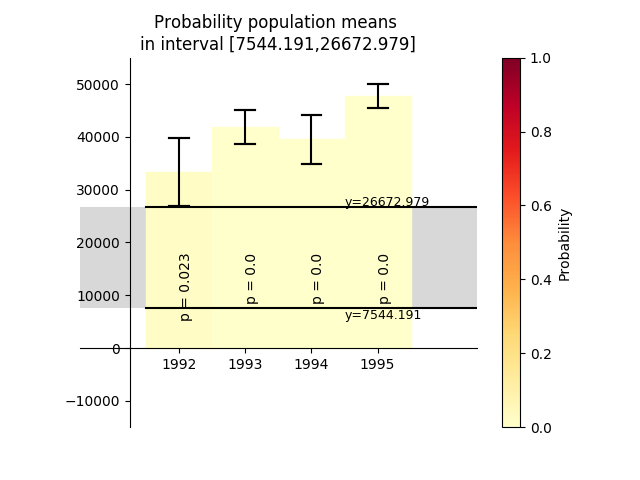

In [89]:
# plt.style.use('default')
fig, ax = plt.subplots()
bars=ax.bar(x, df_means, 
            width=1, align='edge', color=['#ea698b','#ac46a1','#6d23b6','#47126b'], 
            yerr=df_ci_lengths
            )

for i in range(len(x)):
    ax.lines.append(ax.plot([x[i]+.35,x[i]+.65], [df_ci_l[i]]*2, color='black')[0])
    ax.lines.append(ax.plot([x[i]+.35,x[i]+.65], [df_ci_u[i]]*2, color='black')[0])

ax.set_xticks(x+.5)
ax.set_xticklabels(['1992','1993','1994','1995'])
ax.set(xlim=(1991,1997), ylim=(-15000,55000))
ax.spines['left'].set_position(('data',1991.75))
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position(('data',0))
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

cmap=cm.ScalarMappable(norm=mcolors.Normalize(0,1),
                       cmap=cm.get_cmap('YlOrRd'))
cmap.set_array([])
cbar = fig.colorbar(cmap, ax=ax)
cbar.set_label('Probability')

lines_list = []
anns_list = []
fill = None

click=Click(ax, on_click, on_drag, 1)
plt.show()
# disconnect_Click(click)